In [2]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path=r"C:\Users\Jayanth\Data science\python sheets\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**steps in outlier analysis**

s-1: find the Q1,Q2,Q3 value
     - np.percentile(column data,q)
        
s-2: calculate the IQR
    IQR=Q3-Q1
    
s-3: calculate lower boundary and upper boundary
    
    - lb: Q1-1.5IQR
    - ub: Q3+1.5IQR
s-4: find the outliers 
    - c1: coloumn data < lb
    - c2: column data > up
    - c: apply the main condition 
    - main data[c]
    

In [8]:
Q1=round(ny.percentile(visa_df['prevailing_wage'],25),2)
Q1

34015.48

In [9]:
Q2=round(ny.percentile(visa_df['prevailing_wage'],50),2)
Q2

70308.21

In [10]:
Q3=round(ny.percentile(visa_df['prevailing_wage'],75),2)
Q3

107735.51

In [11]:
IQR=Q3-Q1
IQR

73720.03

In [12]:
lb=Q1-1.5*IQR
lb

-76564.565

In [13]:
ub=Q3+1.5*IQR
ub

218315.555

In [14]:
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub

In [15]:
c=c1|c2

In [16]:
outliers_df=visa_df[c]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [34]:
c1=visa_df['prevailing_wage']>=lb
c2=visa_df['prevailing_wage']<ub
con=c1&c2
non_out=visa_df[con]
non_out

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [ ]:
**compare original data with non outliers**
will plot histogram and boxplot 

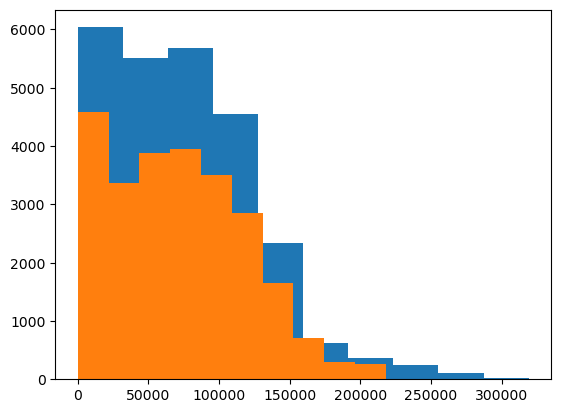

In [36]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_out['prevailing_wage'])
plt.show()

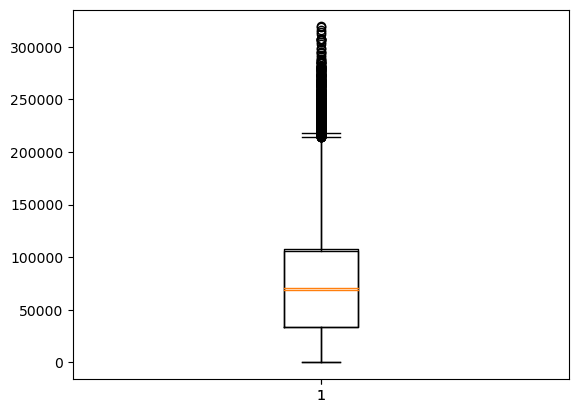

In [38]:
plt.boxplot((visa_df['prevailing_wage']))
plt.boxplot((non_out['prevailing_wage']))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23e94def1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23e94dec450>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e94dedc50>],
 'medians': [<matplotlib.lines.Line2D at 0x23e94ce4790>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e94defed0>],
 'means': []}

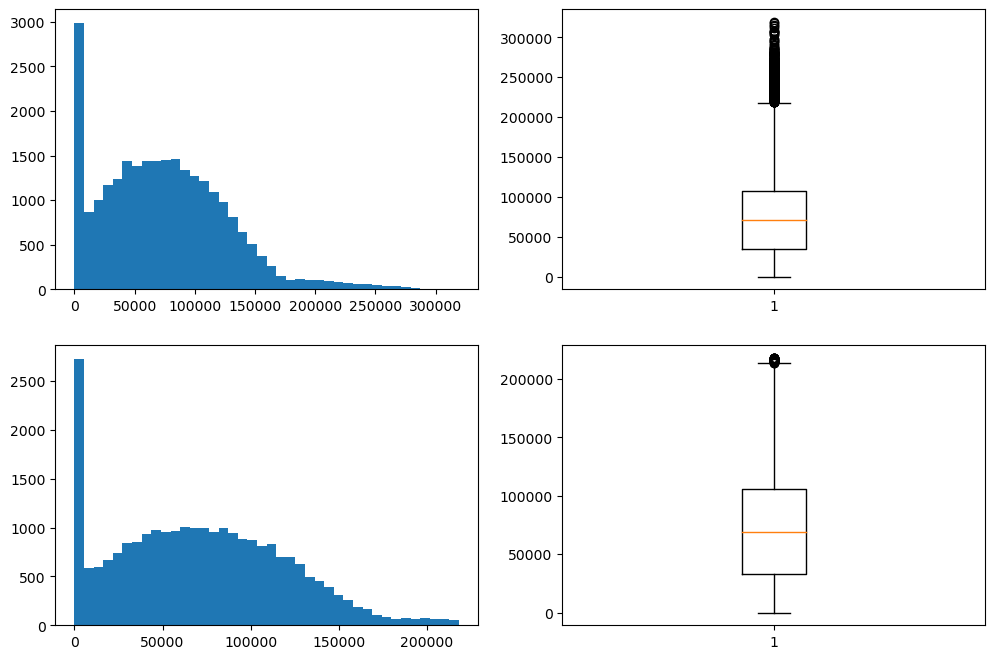

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_out['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_out['prevailing_wage'])

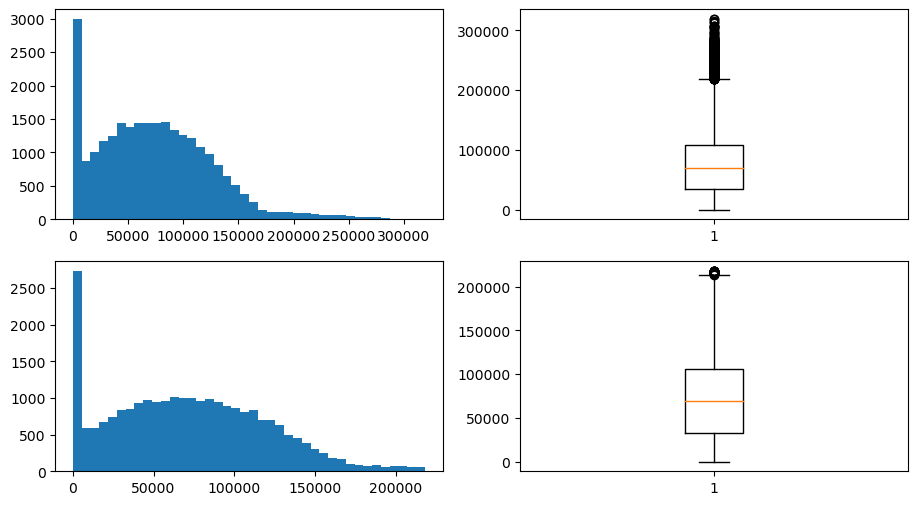

In [44]:
plt.figure(figsize=(11,6))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_out['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_out['prevailing_wage'])
plt.show()

# how to deal outliers:

**drop the outliers**
  - we can drop the outliers if outlier percentage <2%
  - but this is not recommended , we lost other columns data also

**impute with median values**
  - as we know that median does not affect by outliers
  - so it is good practise we can impute outliers with median value

**cap with Q1 OR Q3 VALUE**
  - if outliers are present less than lower bound then fill with Q1
  - if outliers are more than upper bound then fill with Q3

In [ ]:
# task-3
#read the each obervation from prevailing wage 
#if that observation <lb or <ub : fill with median value
#else: keep it as it is

#take empty list=[]
# median = visa_df['pwage'].median()
# for i in visa_df['pwage']:
# if i<lb or i>ub:
    


In [5]:
path=r"C:\Users\Jayanth\Data science\python sheets\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [19]:
median=visa_df['prevailing_wage'].median()

list1=[]
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(median)
    else:
        list1.append(i)
visa_df['prevailing_wage_new']=list1

<function matplotlib.pyplot.show(close=None, block=None)>

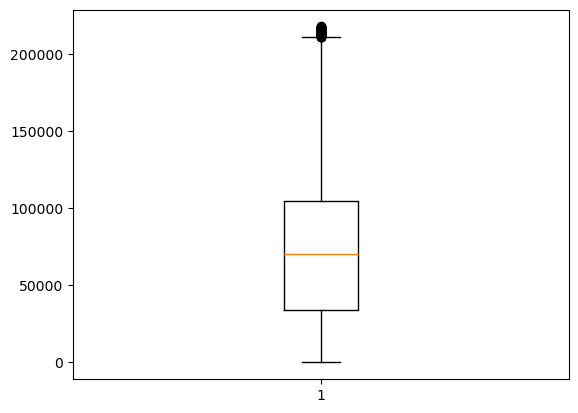

In [20]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show

**ny.where**

In [ ]:
# read the data again
path=r"C:\Users\Jayanth\Data science\python sheets\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

In [ ]:
- above replace one we use a traditional approch
-

In [31]:
dict1={'Name':['A','B','C','D'],
      'Num':[1,2,3,4]}
d=pd.DataFrame(dict1)

ny.where(con,true,false)
 - will take 3 arguments 
    - condition
      - con=d['num']>2
    - true value
      - t=100
    - false value
      - f=d['num']
    

In [32]:
l=ny.where(d['Num']>2,100,d['Num'])

d['Num']=l
d

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


In [ ]:
#median=visa_df['prevailing_wage'].median()

#list1=[]
#for i in visa_df['prevailing_wage']:
    #if i<lb or i>ub:
        #list1.append(median)
   # else:
       # list1.append(i)
#visa_df['prevailing_wage_new']=list1

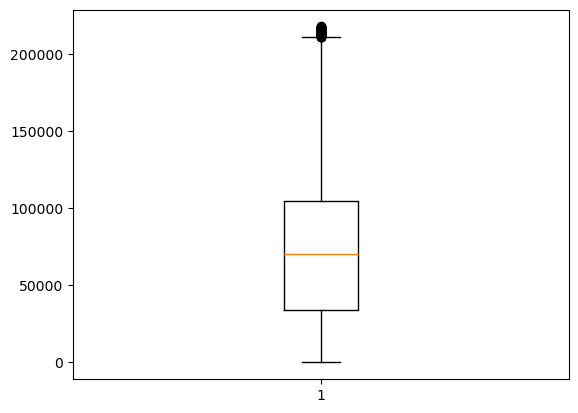

In [36]:
median=visa_df['prevailing_wage'].median()
c1=visa_df['prevailing_wage']<lb
c2= visa_df['prevailing_wage']>ub
con=c1|c2
f=visa_df['prevailing_wage']
visa_df['prevailing_wage']=ny.where(con,median,f)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()